Sua tarefa é adicionar uma coluna com o código de cada ação, passar a data como dtype datatime e transformá-la em index. Depois deve juntar todos os arquivos em um só. Quando tiver feito tudo isso, responda a pergunta: Qual das 5 ações teve a maior média de fechamento no período de julho a setembro de 2019?

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
apple = pd.read_csv('AAPL.csv')
amazon = pd.read_csv('AMZN.csv')
goog = pd.read_csv('GOOG.csv')
netflix = pd.read_csv('NFLX.csv')
tesla = pd.read_csv('TSLA.csv')

In [3]:
# Converter os dados da Tabela 'Date' para datetime

apple['Date'] = pd.to_datetime(apple['Date'])
amazon['Date'] = pd.to_datetime(amazon['Date'])
goog['Date'] = pd.to_datetime(goog['Date'])
netflix['Date'] = pd.to_datetime(netflix['Date'])
tesla['Date'] = pd.to_datetime(tesla['Date'])

# Passar um valor único em uma coluna do dataset (também conhecido como Broadcast)

apple['Code'] = 1

amazon['Code'] = 2

goog['Code'] = 3

netflix['Code'] = 4

tesla['Code'] = 5

In [4]:
# Concatenar todos Dataframes

geral = pd.concat([apple, amazon, goog, netflix, tesla])

# geral.info()

# Transformar Tabela 'Date' em Index

geral.set_index(['Date'], inplace=True)

In [5]:
# Função Lambda para renomear os Códigos das Empresas

def code_empresa(x):
    if x == 1:
        x = 'Apple'
    if x == 2:
        x = 'Amazon'
    if x == 3:
        x = 'Google'
    if x == 4:
        x = 'Netflix'
    if x == 5:
        x = 'Tesla'
    return x

geral['Code'] = geral['Code'].apply(lambda x: code_empresa(x))

In [6]:
# Fatiar, agrupar e agregar valores na consulta

geral.loc['2019-09-06': '2019-09-11'].groupby('Code').max()

,Open,High,Low,Close,Adj Close,Volume
Code,,,,,,
Amazon,1841.000000,1850.000000,1826.400024,1833.510010,1833.510010,2999500
Apple,218.070007,223.710007,217.729996,223.589996,222.392929,44289600
Google,1208.130005,1222.599976,1202.521973,1220.170044,1220.170044,1471900
Netflix,294.809998,301.549988,290.600006,294.339996,294.339996,12320200
Tesla,237.380005,248.169998,236.000000,247.100006,247.100006,10042800


In [12]:
# Função para construir boxplot

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="Code", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

In [10]:
label_quali = {'Code':{1:'Apple',2:'Amazon',3:'Google',4:'Netflix',5:'Tesla'}    
}

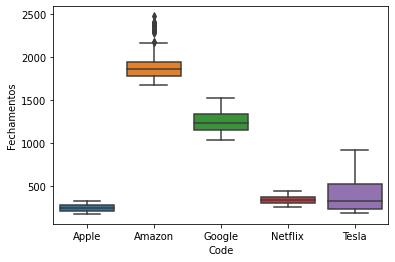

In [13]:
grafico_boxplot_grp(geral.replace(label_quali), "Close", "Fechamentos")

In [7]:
geral.head()

,Open,High,Low,Close,Adj Close,Volume,Code
Date,,,,,,,
2019-05-07,205.880005,207.419998,200.830002,202.860001,200.239075,38763700,Apple
2019-05-08,201.899994,205.339996,201.750000,202.899994,200.278534,26339500,Apple
2019-05-09,200.399994,201.679993,196.660004,200.720001,198.126709,34908600,Apple
2019-05-10,197.419998,198.850006,192.770004,197.179993,195.381973,41208700,Apple
2019-05-13,187.710007,189.479996,182.850006,185.720001,184.026489,57430600,Apple
